# Tutorial

This tutorial gives some examples of how to use the $f(R)$ gravity matter power spectrum boost emulator.

Start by importing and loading the emulator:

In [1]:
# Will be used to produce some plots.
import matplotlib.pyplot as plt

# Import the f(R) matter power spectrum boost class.
from emantis import FofrBoost

# Initialise and emulator instance.
emu = FofrBoost()

## Basic usage

Pass some cosmological parameters to the emulator and recover the matter power spectrum boost:

Training the emulator at aexp=1.0000... done.


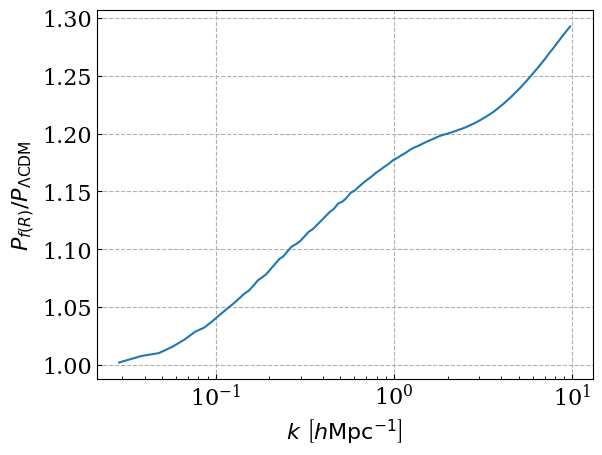

In [2]:
# Define the cosmological parameters and scale factor.
omega_m = 0.3
sigma8_lcdm = 0.8
logfR0 = 5
aexp = 1

# Predict the power spectrum boost for a given set of cosmological parameters and a given scale factor.
boost_pred = emu.predict_boost(omega_m, sigma8_lcdm, logfR0, aexp, k = None)

# Recover then k-bins centres (h/Mpc) at which the boost prediction is given by default.
kbins = emu.kbins

# Plot the predicted boost.
plt.plot(kbins, boost_pred)
plt.xscale('log')
plt.xlabel(r'$k \ \left[h\mathrm{Mpc}^{-1}\right]$')
plt.ylabel(r'$P_{f(R)}/P_{\Lambda\mathrm{CDM}}$')
plt.grid(True, linestyle='--')
plt.show()

:::{note}
The ``logfR0`` parameter refers to the value of $-\log_{10}{|f_{R_0}|}$.
:::

In the above example ``boost_pred`` is a 1D array giving the matter power spectrum boost for each wavenumber in ``kbins``.
By default, the predictions are given for the wavenumber bins used to train the emulator.
It is also possible to request predictions at custom wavenumbers, by using the optional ``k`` argument of the ``predict_boost`` function.

Notice that the emulator prints a message telling the user that it is training itself at a given scale factor node.
Indeed, the emulator training will be performed as necessary each time a new scale factor node is requested (or needed for scale factor interpolation) for the first time.
The training is fast and should not take more than a few seconds per scale factor node on a standard laptop processor.
Alternatively, {func}`.train_all` can be called once in order to train all scale factor nodes before requesting any predictions:

In [3]:
# Use multiple processes to speed up the training.
emu.n_jobs = 4
# Train the emulator at all scale factor nodes.
emu.train_all()

All scale factor nodes will be trained.
Training the emulator at aexp=0.3333... done.
Training the emulator at aexp=0.3650... done.
Training the emulator at aexp=0.4000... done.
Training the emulator at aexp=0.4167... done.
Training the emulator at aexp=0.4444... done.
Training the emulator at aexp=0.4762... done.
Training the emulator at aexp=0.5000... done.
Training the emulator at aexp=0.5263... done.
Training the emulator at aexp=0.5556... done.
Training the emulator at aexp=0.5882... done.
Training the emulator at aexp=0.6250... done.
Training the emulator at aexp=0.6667... done.
Training the emulator at aexp=0.7042... done.
Training the emulator at aexp=0.7692... done.
Training the emulator at aexp=0.8000... done.
Training the emulator at aexp=0.8696... done.
Training the emulator at aexp=0.9091... done.
Training the emulator at aexp=0.9524... done.
Training the emulator at aexp=1.0000... done.
Training completed! No more training will be required for this emulator instance.


:::{note}
The emulator training can be speed up by using multiple processes. This can be achieved by setting ``emu.n_jobs`` > 1.
:::

The emulator is now able to give predictions at any scale factor within the emulation range without requiring any further training.

## Vectorised mode

The emulator is able to output predictions for multiple cosmological models and scale factors at a time.
You can pass the cosmological parameters in the form of lists or 1D arrays (one per cosmological parameter) in order to get multiple predictions with a single emulator call.
In the same way, multiple scale factors per cosmological model can be requested at once.

In [4]:
# Define multiple cosmological models.
omega_m = [0.25, 0.3, 0.35]
sigma8_lcdm = [0.8, 0.8, 0.8] # The three cosmological parameters must always have the same shape.
logfR0 = [4.5, 5, 6]

# It is possible to request multiple scale factors per cosmological model.
aexp = [0.5, 1]

# Recover then k-bins centres (h/Mpc) at which the boost prediction is given by default.
kbins = emu.kbins

# Predict the power spectrum boost for multiple cosmological parameters and scale factors.
boost_pred = emu.predict_boost(omega_m, sigma8_lcdm, logfR0, aexp)

In this example, the output ``boost_pred`` is a 3D array.
The first dimension corresponds to the scale factors, the second one to each cosmological model and the last one to the wavenumber bins.
For instance, we can plot the obtained boosts in the following way:

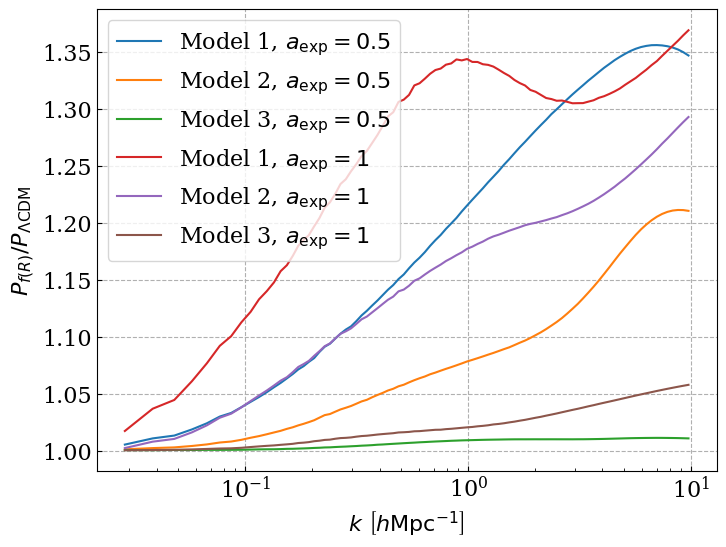

In [5]:
plt.figure(figsize=(8,6))

for i,a in enumerate(aexp):
    for j in range(len(omega_m)):
        plt.plot(kbins, boost_pred[i,j,:], label=fr'Model {j+1}, $a_\mathrm{{exp}}={a}$')

plt.xscale('log')
plt.xlabel(r'$k \ \left[h\mathrm{Mpc}^{-1}\right]$')
plt.ylabel(r'$P_{f(R)}/P_{\Lambda\mathrm{CDM}}$')
plt.grid(True, linestyle='--')
plt.legend()
plt.show()

:::{warning}
The three parameters *omega_m*, *sigma8_lcdm* and *logfR0* must always have the same shape.
:::

:::{note}
Requesting N cosmological models at once is significantly faster than calling the emulator for a single model N times.
:::